# Pandas

## Overview
Pandas is one of the most popular Python data analysis toolkits. It contains adequate data structure and functions to handle and visualize various kinds of data sets. This tutorial is attended for the beginners at Pandas. It will introduce some useful tools in Pandas package to process the fetched data. We will focus on the basic usage of handy methods with simple and interesting examples.

## Content
1. Installing the libraries
2. Series
3. DataFrame
4. GroupBy
5. Visualization

## Installing the libraries
Installing with Anaconda installer: Anaconda includes Python and popular packages like Pandas and SciPy. It is convenient for the beginners to install all the useful packages in bundle.

    Windows: https://www.anaconda.com/download/#windows

    macOS: https://www.anaconda.com/download/#macos


Installing with Miniconda: If you only want to install a specific package, you can use the package manager `conda`. Miniconda contains Python and conda. Download the Miniconda installer: https://conda.io/miniconda.html

    $ conda install pandas

Installing with `pip`

    $ pip install pandas

In [576]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use("svg")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

/Users/yangfanshu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/yangfanshu/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/yangfanshu/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/yangfanshu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/yangfanshu/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/yangfanshu/anaconda3/lib/python3.6/site-packages/ipykernel/kerne

Here we will use some tweets data (tweet.csv, user.csv) extracted from Twitter api: https://developer.twitter.com/en/docs

In [304]:
tweets = pd.read_csv("tweets.csv")
tweets.head()

,screen_name,created_at,retweet_count,favorite_count,text
0,realDonaldTrump,Fri Sep 09 02:00:32 +0000 2016,2859,7030,Final poll results from NBC on last nights Com...
1,realDonaldTrump,Fri Sep 09 00:39:36 +0000 2016,6463,17951,It wasn't Matt Lauer that hurt Hillary last ni...
2,realDonaldTrump,Thu Sep 08 23:56:22 +0000 2016,5405,13223,More poll results from last nights Commander-i...
3,realDonaldTrump,Thu Sep 08 19:52:32 +0000 2016,11633,27028,Last nights results - in poll taken by NBC. #A...
4,realDonaldTrump,Thu Sep 08 18:17:01 +0000 2016,3824,12567,"With Luis, Mexico and the United States would ..."


## Series

`pandas.Series` is an one-dimensional ndarray. You can try to create a simple Series from ndarray, list and dictionary. Change the index if you want.

In [305]:
ser = pd.Series(["practical","data","science","tutorial"], index = [5,6,7,8])
ser

5    practical
6         data
7      science
8     tutorial
dtype: object

#### Basic Attributes and Methods
Press keyboard shortcut `tab` in jupyter notebook to peek all the available attributes and methods after the dot.

We can use some `Series` attributes to better explore the data. 
To know more about the attributes, explore https://pandas.pydata.org/pandas-docs/stable/api.html#attributes. Here we list some of the handy attributes as below.

In [306]:
print (ser.index)
print (ser.size)
print (ser.dtype)
print (ser.values)

Int64Index([5, 6, 7, 8], dtype='int64')
4
object
['practical' 'data' 'science' 'tutorial']


Another common way to build a Series is to extract a column of data from `.csv` file with label. After extracting a column data, we can operate on it with `pandas.Series` methods (identify by parentheses). Take the `tweets.csv` as an example.

In [307]:
retweets = tweets["retweet_count"]
print (retweets.dtype)
print (retweets.mean()) # calculate mean
print (retweets.drop(1).head()) #drop using index
print (tweets["screen_name"].drop_duplicates().head()) #drop duplicated names

int64
286.0540885084684
0     2859
2     5405
3    11633
4     3824
5     3710
Name: retweet_count, dtype: int64
0     realDonaldTrump
20          mgleslie6
34              Trump
54          TrumpGolf
74      TiffanyATrump
Name: screen_name, dtype: object


If you want to keep the result of operations, re-assign it to the column, or set `inplace = True`, otherwise the operations will not be stored.

In [308]:
ex2 = pd.Series(["b","a","c"])

In [309]:
ex2.sort_values(ascending = False)
ex2

0    b
1    a
2    c
dtype: object

In [310]:
ex2.sort_values(ascending = False, inplace = True)
ex2

2    c
0    b
1    a
dtype: object

In [311]:
#re-load data for further practices
tweets = pd.read_csv("tweets.csv")

In [602]:
tweets["created_at"] = pd.to_datetime(tweets["created_at"])
tweets.head()

,screen_name,created_at,retweet_count,favorite_count,text
0,realDonaldTrump,2016-09-09 02:00:32,2859,7030,Final poll results from NBC on last nights Com...
1,realDonaldTrump,2016-09-09 00:39:36,6463,17951,It wasn't Matt Lauer that hurt Hillary last ni...
2,realDonaldTrump,2016-09-08 23:56:22,5405,13223,More poll results from last nights Commander-i...
3,realDonaldTrump,2016-09-08 19:52:32,11633,27028,Last nights results - in poll taken by NBC. #A...
4,realDonaldTrump,2016-09-08 18:17:01,3824,12567,"With Luis, Mexico and the United States would ..."


### Boolean Filter
First, we can establish a boolean filter with `string` functions `contains()`. We will filter out all the tweets that includes the key word "Trump". Remember that we can not directly operate the ndarray of data using the common `string` methods. Therefore, the Series should be converted to `string object` first using `.str` function.

We store the filtered data in a mask column `textFilter`. Notice that the filter is not a real column, and it will not change the original data in Series.

In [312]:
textFilter = tweets["screen_name"].str.contains("Tiffany")
tweets[textFilter].head()

,screen_name,created_at,retweet_count,favorite_count,text
74,TiffanyATrump,Fri Sep 16 20:51:51 +0000 2016,152,414,🇺🇸 #YouthForTrump #MillennialsForTrump #MAGA #...
75,TiffanyATrump,Tue Aug 16 04:16:01 +0000 2016,47,238,I spy NYC #backhome https://t.co/0TtqaDjLRO
76,TiffanyATrump,Mon Aug 15 00:43:20 +0000 2016,46,209,Just posted a photo https://t.co/56rixitkxS
77,TiffanyATrump,Fri Aug 12 22:22:15 +0000 2016,49,233,Bye for now NYC https://t.co/RTf09HtTJs
78,TiffanyATrump,Fri Jul 29 03:24:44 +0000 2016,700,0,RT @LaraLeaTrump: #Throwback ⬅️ Last week watc...


Or we can choose the hottest tweets by the number of retweet which larger than 10000.

In [313]:
numberFilter = tweets["retweet_count"] > 10000
tweets[numberFilter].head()

,screen_name,created_at,retweet_count,favorite_count,text
3,realDonaldTrump,Thu Sep 08 19:52:32 +0000 2016,11633,27028,Last nights results - in poll taken by NBC. #A...
84,TiffanyATrump,Fri Jul 22 06:11:15 +0000 2016,10083,0,RT @realDonaldTrump: MAKE AMERICA SAFE AND GRE...
131,mike_pence,Sat Sep 10 20:53:21 +0000 2016,27608,0,RT @BarackObama: RT if you agree: We need a Pr...
529,VinceMcMahon,Wed Jul 13 01:17:09 +0000 2016,25266,47771,I don’t care who you are … Get OUT of my weigh...
1911,Cali_Ally_,Tue Sep 13 19:12:46 +0000 2016,39202,0,RT @kanyewest: It’s our life's mission to crea...


### Catergorize data

Image that we are now calculting how much should we pay for our shopping cart in a supermarket. 

`map()` method is a convenient way to catergorize data to different types. It iterates over the items in Series, search item in the key of the category dictionary, and then return the value from dictionary.

In [314]:
shoppingCart = pd.Series(["apple", "cherry", "banana", "cucumber", "apple"])
priceCategory = {"apple": "$3", "cherry": "$20", "banana": "$1.5", "cucumber": "$3"}

In [315]:
invoice = shoppingCart.map(priceCategory)
invoice

0      $3
1     $20
2    $1.5
3      $3
4      $3
dtype: object

Then we can operate data according to its price. We should change the string type price to float data type for futher calculation.

In [316]:
invoice = invoice.str.replace("$","").astype(float)
invoice.sum()

30.5

By `sum`, the total invoice price is 30.5.

Also, we can categorize items with condition. First we list all the products we want to buy. If the price is under $10, we will buy three of them; otherwise we will buy only one piece.

This time, we use `iteritems()` method in Series to iterate over items and store the number of products to buy.

In [317]:
shoppingList = pd.Series(["apple", "cherry", "banana", "cucumber"])
priceCategory = {"apple": "$3", "cherry": "$20", "banana": "$1.5", "cucumber": "$3"}

In [318]:
for (index, value) in invoice.iteritems():
    if value < 10:
        value += value * 3
    else:
        value += value
print (invoice)
invoice.sum()

0     3.0
1    20.0
2     1.5
3     3.0
4     3.0
dtype: float64


30.5

At last, you can also use `Series.value_counts()` method to count the number of products according to the shopping list and figure out which ones are not yet added to cart. Here we combine the `Categoricals` pandas data type with `Series`. The `value_counts()` includes all the categories, including those are not on the source list. To explore more about Categorical Data, use the pandas document:https://pandas.pydata.org/pandas-docs/stable/categorical.html.

In [319]:
shopList = ["apple", "cherry", "banana", "cucumber","bluberry"]
ser = pd.Series(pd.Categorical(["apple", "cherry", "banana", "apple","apple"], 
                               categories = shopList))
ser.value_counts()

apple       3
banana      1
cherry      1
bluberry    0
cucumber    0
dtype: int64

Here we only use two simple example to illustrate how can we categorize data using `map()` and `iteritems()` and `value_counts()` methods. You can choose one depending on whether it needs future conditional operations or not.

## DataFrame

DataFrame is a two-dimensional data structure. A row or a column of a DataFrame is a Series in pandas.

There are many ways to construct a dataFrame. We are going to introduce two common ones: `pd.DataFrame()` and `read_csv()`.

In [320]:
# contruct from dictionary
dic1 = {"col1":[1,2,3], "col2":["practical","data","science"],"col3":["a","b","c"]}
ex3 = pd.DataFrame(dic1)
ex3

,col1,col2,col3
0,1,practical,a
1,2,data,b
2,3,science,c


In [393]:
user = pd.read_csv("users.csv")
user.head(3)

,name,screen_name,location,created_at,friends_count,followers_count,statuses_count,favourites_count
0,Donald J. Trump,realDonaldTrump,"New York, NY",Wed Mar 18 13:46:38 +0000 2009,42,11397769,33136,38
1,Trump Organization,Trump,"New York, NY",Wed Apr 13 16:51:54 +0000 2016,35,9954,43,125
2,Trump Golf,TrumpGolf,NaN,Mon Feb 03 13:46:03 +0000 2014,200,8797,758,251


### Index

Index is a very important attribute in DataFrame. We can access, sort, aggregate, align, slice and etc. based on the index.

In [322]:
print (user.index.values.tolist()[:5])

[0, 1, 2, 3, 4]


The default index will start from 0 for a new DataFrame. After we set a new index, we can choose whether to drop the original numpy index or not. Also, we can set index when we import the .csv file.

In [323]:
user = user.set_index("name")
user.head(3)

,screen_name,location,created_at,friends_count,followers_count,statuses_count,favourites_count
name,,,,,,,
Donald J. Trump,realDonaldTrump,"New York, NY",Wed Mar 18 13:46:38 +0000 2009,42,11397769,33136,38
Trump Organization,Trump,"New York, NY",Wed Apr 13 16:51:54 +0000 2016,35,9954,43,125
Trump Golf,TrumpGolf,NaN,Mon Feb 03 13:46:03 +0000 2014,200,8797,758,251


If we set another column as the index now, here is what will happen.

In [324]:
user.set_index("screen_name").head(3)

,location,created_at,friends_count,followers_count,statuses_count,favourites_count
screen_name,,,,,,
realDonaldTrump,"New York, NY",Wed Mar 18 13:46:38 +0000 2009,42,11397769,33136,38
Trump,"New York, NY",Wed Apr 13 16:51:54 +0000 2016,35,9954,43,125
TrumpGolf,NaN,Mon Feb 03 13:46:03 +0000 2014,200,8797,758,251


Notice that the `name` column has been replaced by the `screen_name` column. In this way we will lose some data. So before we set another index, we need to use `reset_index()` first.

When we reset the index, the `name` column will be released from index column. And now we can reset another index.

In [325]:
user = user.reset_index()
user.head(3)

,name,screen_name,location,created_at,friends_count,followers_count,statuses_count,favourites_count
0,Donald J. Trump,realDonaldTrump,"New York, NY",Wed Mar 18 13:46:38 +0000 2009,42,11397769,33136,38
1,Trump Organization,Trump,"New York, NY",Wed Apr 13 16:51:54 +0000 2016,35,9954,43,125
2,Trump Golf,TrumpGolf,NaN,Mon Feb 03 13:46:03 +0000 2014,200,8797,758,251


In [394]:
user = user.set_index("screen_name")
user.head(3)

,name,location,created_at,friends_count,followers_count,statuses_count,favourites_count
screen_name,,,,,,,
realDonaldTrump,Donald J. Trump,"New York, NY",Wed Mar 18 13:46:38 +0000 2009,42,11397769,33136,38
Trump,Trump Organization,"New York, NY",Wed Apr 13 16:51:54 +0000 2016,35,9954,43,125
TrumpGolf,Trump Golf,NaN,Mon Feb 03 13:46:03 +0000 2014,200,8797,758,251


As screen name is unique for Twitter accounts, we will use `screen_name` as index.

### Access data

We can access data using index with `loc[]`, `iloc[]` and `ix[]` method. It searches the value in index and return that row if keyword found. If not, it will create a new row with that keyword.

In [327]:
user.loc["Trump"]

name                            Trump Organization
location                              New York, NY
created_at          Wed Apr 13 16:51:54 +0000 2016
friends_count                                   35
followers_count                               9954
statuses_count                                  43
favourites_count                               125
Name: Trump, dtype: object

We can also access a range of rows with index. It works better after we sorted the index. For example, the student id or the employee number.

The second parameter is the column of that Series you want to peek.

In [328]:
user.loc["Trump", "location"]

'New York, NY'

In [329]:
user.loc["realDonaldTrump": "LaraLeaTrump"]

,name,location,created_at,friends_count,followers_count,statuses_count,favourites_count
screen_name,,,,,,,
realDonaldTrump,Donald J. Trump,"New York, NY",Wed Mar 18 13:46:38 +0000 2009,42,11397769,33136,38
Trump,Trump Organization,"New York, NY",Wed Apr 13 16:51:54 +0000 2016,35,9954,43,125
TrumpGolf,Trump Golf,NaN,Mon Feb 03 13:46:03 +0000 2014,200,8797,758,251
TiffanyATrump,Tiffany Trump,NaN,Tue Feb 01 20:59:30 +0000 2011,79,63138,573,28
IngrahamAngle,Laura Ingraham,DC,Thu Jun 25 21:03:25 +0000 2009,289,851876,26523,71
mike_pence,Mike Pence,NaN,Fri Feb 27 23:04:51 +0000 2009,1208,207552,4572,746
TeamTrump,Official Team Trump,USA,Mon May 09 14:15:10 +0000 2016,18,65833,2714,348
DRUDGE_REPORT,DRUDGE REPORT,US,Tue May 06 05:34:47 +0000 2008,2,999809,175278,0
MrsVanessaTrump,Vanessa Trump,NaN,Fri Jan 27 13:10:13 +0000 2012,155,50517,2028,240


The `iloc[]` method use row number as index to locate the data. The second parameter can also be a range of columns of that Series.

In [330]:
#user.iloc[1]
user.iloc[1, 1:5]

location                             New York, NY
created_at         Wed Apr 13 16:51:54 +0000 2016
friends_count                                  35
followers_count                              9954
Name: Trump, dtype: object

The `ix[]` is the most flexible one, but it is deprecated now. We can access data with either index value or row number. The second parameter can also be a combination of target columns, included in a blacket.

In [331]:
user.ix["Trump", [1,2,4,5]]

/Users/yangfanshu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


location                             New York, NY
created_at         Wed Apr 13 16:51:54 +0000 2016
followers_count                              9954
statuses_count                                 43
Name: Trump, dtype: object

### Query data

There are two common ways to query data with conditions. The first one is `query()` method in dataFrame.

In [300]:
user.query("screen_name == 'Trump'")

,name,location,created_at,friends_count,followers_count,statuses_count,favourites_count
screen_name,,,,,,,
Trump,Trump Organization,"New York, NY",Wed Apr 13 16:51:54 +0000 2016,35,9954,43,125


In [341]:
user.query("followers_count > 100 and friends_count > 200").head(3)

,name,location,created_at,friends_count,followers_count,statuses_count,favourites_count
screen_name,,,,,,,
IngrahamAngle,Laura Ingraham,DC,Thu Jun 25 21:03:25 +0000 2009,289,851876,26523,71
mike_pence,Mike Pence,NaN,Fri Feb 27 23:04:51 +0000 2009,1208,207552,4572,746
LaraLeaTrump,Lara Trump,New York City,Sat Sep 19 12:49:26 +0000 2009,342,60552,2275,2381


In [340]:
user.query("location not in ['DC', 'NYC']").head(3)

,name,location,created_at,friends_count,followers_count,statuses_count,favourites_count
screen_name,,,,,,,
realDonaldTrump,Donald J. Trump,"New York, NY",Wed Mar 18 13:46:38 +0000 2009,42,11397769,33136,38
Trump,Trump Organization,"New York, NY",Wed Apr 13 16:51:54 +0000 2016,35,9954,43,125
TrumpGolf,Trump Golf,NaN,Mon Feb 03 13:46:03 +0000 2014,200,8797,758,251


The second one is `.where()` method. It works similar as the boolean filter in Series. However, it still return the whole table with only the Series that match the condition is not `NaN`.

In [350]:
user.where(user["friends_count"] > 200).head(8)

,name,location,created_at,friends_count,followers_count,statuses_count,favourites_count
screen_name,,,,,,,
realDonaldTrump,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trump,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TrumpGolf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TiffanyATrump,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IngrahamAngle,Laura Ingraham,DC,Thu Jun 25 21:03:25 +0000 2009,289.0,851876.0,26523.0,71.0
mike_pence,Mike Pence,NaN,Fri Feb 27 23:04:51 +0000 2009,1208.0,207552.0,4572.0,746.0
TeamTrump,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DRUDGE_REPORT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Of course, you can find the target value by iterating all values and print the target ones.

In [367]:
newYorker = [user.iloc[i]["name"] for i in range(len(user)) 
                                  if user.iloc[i]["location"] == "NYC"]
newYorker[:10]

['Sean Hannity',
 'NY Daily Quote',
 'HuffPost Celebrity',
 'Elise Jordan',
 'Dorsey Shaw',
 'Richard Bradley',
 'Frank Rich',
 'Trish Regan',
 'Hailey Clauson',
 'S. Winston Wolkoff']

### Apply

Once we have defined a method, we can apply to it the whole dataFrame or specific rows or columns. The `apply()` will return a Series. It will be useful in separate concerns.

For example, we are running a restaurant and want to add a stable to our menu. If the dish contains 'tofu', the stable will be 'rice'. If the dish contains 'beef', the side will be 'pasta'. Otherwise, it would be 'noodles'.

In [371]:
def add_side(components):
    if "tofu" in components:
        components.append("rice")
    elif "beef" in components:
        components.append("pasta")
    else:
        components.append("noodles")
    return components

In [372]:
menu = pd.DataFrame({"dish": [1,2,3,4,5],
              "components": [["tofu", "lettuce", "onion"],
                            ["tofu", "brocolli", "corrot"],
                            ["beef", "brocolli", "egg"],
                            ["fish", "lettuce", "black beans"],
                            ["beef", "kale", "onion"]]})

In [375]:
menu["components"].apply(add_side)

0             [tofu, lettuce, onion, rice]
1           [tofu, brocolli, corrot, rice]
2             [beef, brocolli, egg, pasta]
3    [fish, lettuce, black beans, noodles]
4               [beef, kale, onion, pasta]
Name: components, dtype: object

We can also apply some build-in methods, especially in calculation.

In [378]:
user.head(3)

,name,location,created_at,friends_count,followers_count,statuses_count,favourites_count
screen_name,,,,,,,
realDonaldTrump,Donald J. Trump,"New York, NY",Wed Mar 18 13:46:38 +0000 2009,42,11397769,33136,38
Trump,Trump Organization,"New York, NY",Wed Apr 13 16:51:54 +0000 2016,35,9954,43,125
TrumpGolf,Trump Golf,NaN,Mon Feb 03 13:46:03 +0000 2014,200,8797,758,251


In [396]:
user["favourites_count"] = user["favourites_count"].apply(np.exp2)
user.head(3)

,name,location,created_at,friends_count,followers_count,statuses_count,favourites_count
screen_name,,,,,,,
realDonaldTrump,Donald J. Trump,"New York, NY",Wed Mar 18 13:46:38 +0000 2009,42,11397769,33136,2.748779e+11
Trump,Trump Organization,"New York, NY",Wed Apr 13 16:51:54 +0000 2016,35,9954,43,4.253530e+37
TrumpGolf,Trump Golf,NaN,Mon Feb 03 13:46:03 +0000 2014,200,8797,758,3.618503e+75


### Delete

`drop()` and `dropna()` method are two basic methods in `pandas.DataFrame` to remove the target rows or columns.

In [406]:
ex4 = pd.DataFrame({"vegetable": ["lettuce", "brocolli", "carrot"],
                   "corn": ["beef", "tofu", "fish"],
                   "stable": ["rice", "pasta", "soba"],
                   "remark": ["sold out","sold out", None]})
ex4

,corn,remark,stable,vegetable
0,beef,sold out,rice,lettuce
1,tofu,sold out,pasta,brocolli
2,fish,None,soba,carrot


drop the colomn that has 'nan'. `axis = 1` means column. Default `axis = 0` means row.

In [408]:
ex4.dropna(axis = 1)

,corn,stable,vegetable
0,beef,rice,lettuce
1,tofu,pasta,brocolli
2,fish,soba,carrot


In [410]:
# drop the column
ex4.drop("corn", axis = 1)

,remark,stable,vegetable
0,sold out,rice,lettuce
1,sold out,pasta,brocolli
2,None,soba,carrot


In [411]:
# drop rows
ex4.drop([1,2])

,corn,remark,stable,vegetable
0,beef,sold out,rice,lettuce


In [424]:
# drop one row with row number index
ex4.drop(ex4.index[-1])

,corn,remark,stable,vegetable
0,beef,sold out,rice,lettuce
1,tofu,sold out,pasta,brocolli


Another way to delete rows and columns is to create a new dataFrame and copy all the matching rows and columns.

In [425]:
ex4[ex4["corn"] != "beef"]

,corn,remark,stable,vegetable
1,tofu,sold out,pasta,brocolli
2,fish,None,soba,carrot


In [426]:
ex4[:-2]

,corn,remark,stable,vegetable
0,beef,sold out,rice,lettuce


## GroupBy

The `DataFrameGroupBy` object in pandas is a very handy tool in data processing. Although it comes from the `pandas.DataFrame.groupby()` method, it is quite different from `DataFrame` object. They do not share many the methods.

In [495]:
ex5 = pd.DataFrame({"vegetable": ["lettuce","brocolli","brocolli","carrot","brocolli","carrot"],
                   "corn": ["beef","beef","beef","tofu","fish","fish"],
                   "stable": ["rice","rice","pasta","pasta","soba","soba"],
                   "price":[10,20,15,15,14,17],
                   "sold":[4,5,6,9,4,6]})
ex5

,corn,price,sold,stable,vegetable
0,beef,10,4,rice,lettuce
1,beef,20,5,rice,brocolli
2,beef,15,6,pasta,brocolli
3,tofu,15,9,pasta,carrot
4,fish,14,4,soba,brocolli
5,fish,17,6,soba,carrot


### Group by one column

In [496]:
corn = ex5.groupby("corn")

We can call `len()` on the GroupBy object 'corn' and see how many groups have been categorized.

In [497]:
len(corn)

3

The `groups` attribute will return as a dictionary of row number index which falls in that category. For example, the row index 0 and 1 belong to the "beef" group. It can be stored as a way to access a specific group of data.

In [498]:
corn.groups

{'beef': Int64Index([0, 1, 2], dtype='int64'),
 'fish': Int64Index([4, 5], dtype='int64'),
 'tofu': Int64Index([3], dtype='int64')}

Then we can use `size()` to see how many rows are categorized to "corn". It performs as `count` in SQL command line. And it will return in an aggregated format.

In [499]:
corn.size()

corn
beef    3
fish    2
tofu    1
dtype: int64

The `count()` method can give the same result as `size()`.

In [529]:
corn.count()

,price,sold,stable,vegetable
corn,,,,
beef,3,3,3,3
fish,2,2,2,2
tofu,1,1,1,1


It will return as a Series. We can also extract all the unique sector in this way.

In [500]:
corn.size().index.values

array(['beef', 'fish', 'tofu'], dtype=object)

The `DataFrameGroupBy` object is difficult to show all the values as typical tables in SQL. To peek the values as groups, we can use `first()` or `last()` method and extract the first or the last row in each group. The sector column 'corn' will be the index.

In [501]:
corn.first()

,price,sold,stable,vegetable
corn,,,,
beef,10,4,rice,lettuce
fish,14,4,soba,brocolli
tofu,15,9,pasta,carrot


Or, we can peek the specific group using `get_group()` method.

In [502]:
corn.get_group("beef")

,price,sold,stable,vegetable
0,10,4,rice,lettuce
1,20,5,rice,brocolli
2,15,6,pasta,brocolli


Now we can perform some operations on each group.

The `max()` and `min()` method will return the Series with the max value of the target columns.

In [503]:
corn["price"].max()
corn[["price", "sold"]].max()

,price,sold
corn,,
beef,20,6
fish,17,6
tofu,15,9


You can also call `mean()` or `sum()` methods on the whold object and it will operate automatically on only the numeric values.

In [504]:
corn.mean()

,price,sold
corn,,
beef,15.0,5.0
fish,15.5,5.0
tofu,15.0,9.0


Iterating over groups is also an important practice on data. Let's take an overview of how it looks like.

In [559]:
for c, group in corn:
    print (c)
    print (group)
    print (type(group))

beef
   corn  price  sold stable vegetable
0  beef     10     4   rice   lettuce
1  beef     20     5   rice  brocolli
2  beef     15     6  pasta  brocolli
<class 'pandas.core.frame.DataFrame'>
fish
   corn  price  sold stable vegetable
4  fish     14     4   soba  brocolli
5  fish     17     6   soba    carrot
<class 'pandas.core.frame.DataFrame'>
tofu
   corn  price  sold stable vegetable
3  tofu     15     9  pasta    carrot
<class 'pandas.core.frame.DataFrame'>


Each group in the iterator will return as a dataFrame. Within each group, we can iterate over Series and conduct further operations.

In [566]:
bestSeller = []
for c, group in corn:
    for i in range(len(group)): #iterate over data frame
        if group["sold"].iloc[i] > 5:
            bestSeller.append((c, group["vegetable"].iloc[i], group["stable"].iloc[i]))
bestSeller

[('beef', 'brocolli', 'pasta'),
 ('fish', 'carrot', 'soba'),
 ('tofu', 'carrot', 'pasta')]

Another insteresting method is `expanding()`, which will accumulate the result within a group using an operator repeatedly.

In [533]:
corn.expanding().sum()

price  sold stable vegetable
corn                                
beef 0   10.0   4.0   rice   lettuce
     1   30.0   9.0   rice  brocolli
     2   45.0  15.0  pasta  brocolli
fish 4   14.0   4.0   soba  brocolli
     5   31.0  10.0   soba    carrot
tofu 3   15.0   9.0  pasta    carrot

`filter()` method will return a subset of the original data with conditions. Default parameter `dropna = True` will drop all the unmatching observations.

In [555]:
corn.filter(lambda x: x["price"].min() > 10, dropna = False)

,price,sold,stable,vegetable
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,15.0,9.0,pasta,carrot
4,14.0,4.0,soba,brocolli
5,17.0,6.0,soba,carrot


### Group by several columns

In [505]:
corn_vege = ex5.groupby(["corn", "vegetable"])

In [506]:
corn_vege.size()

corn  vegetable
beef  brocolli     2
      lettuce      1
fish  brocolli     1
      carrot       1
tofu  carrot       1
dtype: int64

In [507]:
corn_vege.sum()

price  sold
corn vegetable             
beef brocolli      35    11
     lettuce       10     4
fish brocolli      14     4
     carrot        17     6
tofu carrot        15     9

If we want to apply different operations to different variables, we can use `agg()` method.

In [526]:
corn_vege.agg({"price": ["max","min"], "sold": "size"}).rename(
            columns={"max": "most expensive", "min": "cheapest", "size":"number of sold" })

price                    sold
               most expensive cheapest number of sold
corn vegetable                                       
beef brocolli              20       15              2
     lettuce               10       10              1
fish brocolli              14       14              1
     carrot                17       17              1
tofu carrot                15       15              1

Or you can apply several operations to each of the numeric value. The result will be arranged clearly as a pivot table.

In [517]:
corn_vege.agg(["sum","mean"])

price       sold     
                 sum  mean  sum mean
corn vegetable                      
beef brocolli     35  17.5   11  5.5
     lettuce      10  10.0    4  4.0
fish brocolli     14  14.0    4  4.0
     carrot       17  17.0    6  6.0
tofu carrot       15  15.0    9  9.0

## Visualization 

We can use `matplotlib` library to plot data.

In [604]:
tweets.head(3)

,screen_name,created_at,retweet_count,favorite_count,text
0,realDonaldTrump,2016-09-09 02:00:32,2859,7030,Final poll results from NBC on last nights Com...
1,realDonaldTrump,2016-09-09 00:39:36,6463,17951,It wasn't Matt Lauer that hurt Hillary last ni...
2,realDonaldTrump,2016-09-08 23:56:22,5405,13223,More poll results from last nights Commander-i...


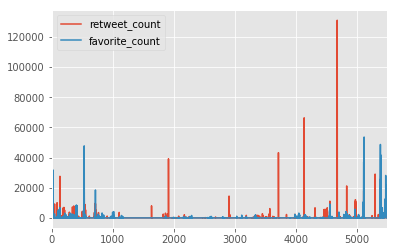

In [605]:
tweets.plot()

## Reference

Series: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

Data Frame: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

Group By: https://pandas.pydata.org/pandas-docs/stable/groupby.html

https://www.udemy.com/data-analysis-with-pandas/learn/v4/t/lecture/5943308?start=0